### Things to be done:
2 scripts are needed: 1 for training and another for prediction

### Ideas:
- Conduct EDA (e.g., pairwise plots/ boxplots to find out if there are any distinct differences between m6a-positive and m6a-negative sites)

- Using upsampling/ downsampling techniques since number of non-m6a sites >> number of m6a sites
    - Undersampling may be suitable for this dataset since this dataset is massive
- Look at only the DRACH sites when coming up with the machine learning model (`https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6913132/`)
- Try including variance of means/ median as variable

In [37]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./Data/full_df trial.csv')
df

,Transcript Name,Gene Name,Position,Bases,Mean SD,Mean_Mean,Mean Dwelling Time,Median SD,Median_Mean,Median Dwelling Time,Label
0,ENST00000000233,ENSG00000004059,243,AAGAC,4.223784,123.702703,0.008264,3.730,125.00,0.006970,0
1,ENST00000000233,ENSG00000004059,244,AGACC,7.382162,125.913513,0.009373,6.650,126.00,0.007970,0
2,ENST00000000233,ENSG00000004059,245,GACCA,4.386989,80.570270,0.007345,3.440,80.50,0.005980,0
3,ENST00000000233,ENSG00000004059,260,CAAAC,3.216424,109.681395,0.006609,2.880,110.00,0.005640,0
4,ENST00000000233,ENSG00000004059,261,AAACT,3.226535,107.889535,0.006813,3.000,108.00,0.005885,0
...,...,...,...,...,...,...,...,...,...,...,...
365509,ENST00000641834,ENSG00000167747,1537,TGACC,6.552982,123.263158,0.007419,5.790,124.00,0.006810,0
365510,ENST00000641834,ENSG00000167747,1538,GACCA,2.540877,82.289474,0.006472,2.330,82.00,0.006310,0
365511,ENST00000641834,ENSG00000167747,1692,TTGAC,4.090577,105.807692,0.008788,3.160,107.00,0.007090,0
365512,ENST00000641834,ENSG00000167747,1693,TGACA,8.702885,113.134615,0.006907,8.675,113.00,0.006705,0


In [2]:
unique_transcript_names = []
for i in df['Transcript Name']:
    if i not in unique_transcript_names:
        unique_transcript_names.append(i)
unique_transcript_names    

['ENST00000000233',
 'ENST00000000412',
 'ENST00000002165',
 'ENST00000003100',
 'ENST00000007516',
 'ENST00000005257',
 'ENST00000001008',
 'ENST00000007390',
 'ENST00000007264',
 'ENST00000009589',
 'ENST00000009041',
 'ENST00000005340',
 'ENST00000016171',
 'ENST00000014930',
 'ENST00000002596',
 'ENST00000005260',
 'ENST00000022615',
 'ENST00000011619',
 'ENST00000005386',
 'ENST00000005286',
 'ENST00000037243',
 'ENST00000023939',
 'ENST00000012443',
 'ENST00000013807',
 'ENST00000037869',
 'ENST00000014914',
 'ENST00000044462',
 'ENST00000053867',
 'ENST00000053468',
 'ENST00000054666',
 'ENST00000158771',
 'ENST00000055077',
 'ENST00000054950',
 'ENST00000160827',
 'ENST00000066544',
 'ENST00000078429',
 'ENST00000081029',
 'ENST00000084795',
 'ENST00000085068',
 'ENST00000175091',
 'ENST00000157812',
 'ENST00000162749',
 'ENST00000166345',
 'ENST00000168216',
 'ENST00000169551',
 'ENST00000170447',
 'ENST00000173527',
 'ENST00000175506',
 'ENST00000199389',
 'ENST00000177742',


In [3]:
labels = pd.read_csv('./Data/data.info')
full_df = df.merge(labels, how='left', left_on = ['Transcript Name', 'Position'], right_on = ['transcript_id', 'transcript_position'])
full_df = full_df.drop(['gene_id', 'transcript_id', 'transcript_position', 'label'],axis=1)
full_df

,Transcript Name,Gene Name,Position,Bases,Mean SD,Mean_Mean,Mean Dwelling Time,Median SD,Median_Mean,Median Dwelling Time,Label
0,ENST00000000233,ENSG00000004059,243,AAGAC,4.223784,123.702703,0.008264,3.730,125.00,0.006970,0
1,ENST00000000233,ENSG00000004059,244,AGACC,7.382162,125.913513,0.009373,6.650,126.00,0.007970,0
2,ENST00000000233,ENSG00000004059,245,GACCA,4.386989,80.570270,0.007345,3.440,80.50,0.005980,0
3,ENST00000000233,ENSG00000004059,260,CAAAC,3.216424,109.681395,0.006609,2.880,110.00,0.005640,0
4,ENST00000000233,ENSG00000004059,261,AAACT,3.226535,107.889535,0.006813,3.000,108.00,0.005885,0
...,...,...,...,...,...,...,...,...,...,...,...
365509,ENST00000641834,ENSG00000167747,1537,TGACC,6.552982,123.263158,0.007419,5.790,124.00,0.006810,0
365510,ENST00000641834,ENSG00000167747,1538,GACCA,2.540877,82.289474,0.006472,2.330,82.00,0.006310,0
365511,ENST00000641834,ENSG00000167747,1692,TTGAC,4.090577,105.807692,0.008788,3.160,107.00,0.007090,0
365512,ENST00000641834,ENSG00000167747,1693,TGACA,8.702885,113.134615,0.006907,8.675,113.00,0.006705,0


In [4]:
full_df = full_df.fillna(0)
full_df

,Transcript Name,Gene Name,Position,Bases,Mean SD,Mean_Mean,Mean Dwelling Time,Median SD,Median_Mean,Median Dwelling Time,Label
0,ENST00000000233,ENSG00000004059,243,AAGAC,4.223784,123.702703,0.008264,3.730,125.00,0.006970,0
1,ENST00000000233,ENSG00000004059,244,AGACC,7.382162,125.913513,0.009373,6.650,126.00,0.007970,0
2,ENST00000000233,ENSG00000004059,245,GACCA,4.386989,80.570270,0.007345,3.440,80.50,0.005980,0
3,ENST00000000233,ENSG00000004059,260,CAAAC,3.216424,109.681395,0.006609,2.880,110.00,0.005640,0
4,ENST00000000233,ENSG00000004059,261,AAACT,3.226535,107.889535,0.006813,3.000,108.00,0.005885,0
...,...,...,...,...,...,...,...,...,...,...,...
365509,ENST00000641834,ENSG00000167747,1537,TGACC,6.552982,123.263158,0.007419,5.790,124.00,0.006810,0
365510,ENST00000641834,ENSG00000167747,1538,GACCA,2.540877,82.289474,0.006472,2.330,82.00,0.006310,0
365511,ENST00000641834,ENSG00000167747,1692,TTGAC,4.090577,105.807692,0.008788,3.160,107.00,0.007090,0
365512,ENST00000641834,ENSG00000167747,1693,TGACA,8.702885,113.134615,0.006907,8.675,113.00,0.006705,0


In [5]:
full_df[full_df['Label'] == 1]

,Transcript Name,Gene Name,Position,Bases,Mean SD,Mean_Mean,Mean Dwelling Time,Median SD,Median_Mean,Median Dwelling Time,Label
52,ENST00000000233,ENSG00000004059,913,GGACC,6.277374,119.296089,0.007148,5.760,119.0,0.005980,1
157,ENST00000000412,ENSG00000003056,2440,GGACT,6.048000,116.400000,0.008958,5.795,116.5,0.007135,1
160,ENST00000000412,ENSG00000003056,2462,GAACC,3.672105,95.657895,0.005710,3.170,95.2,0.004870,1
166,ENST00000000412,ENSG00000003056,2499,GGACA,7.395455,114.863636,0.008391,7.085,115.0,0.006835,1
688,ENST00000007390,ENSG00000007520,1096,AGACA,3.988958,121.875000,0.010426,3.885,121.5,0.008210,1
...,...,...,...,...,...,...,...,...,...,...,...
365485,ENST00000641834,ENSG00000167747,1093,GGACT,4.889315,120.684932,0.008723,4.960,121.0,0.007640,1
365494,ENST00000641834,ENSG00000167747,1255,GGACA,4.964286,116.014286,0.009593,4.715,116.0,0.008020,1
365497,ENST00000641834,ENSG00000167747,1259,AGACA,6.250250,127.475000,0.008347,5.585,128.0,0.007625,1
365500,ENST00000641834,ENSG00000167747,1348,GGACA,4.929726,116.342466,0.007300,4.580,116.0,0.005310,1


In [6]:
full_df[full_df['Label'] == 0]

,Transcript Name,Gene Name,Position,Bases,Mean SD,Mean_Mean,Mean Dwelling Time,Median SD,Median_Mean,Median Dwelling Time,Label
0,ENST00000000233,ENSG00000004059,243,AAGAC,4.223784,123.702703,0.008264,3.730,125.00,0.006970,0
1,ENST00000000233,ENSG00000004059,244,AGACC,7.382162,125.913513,0.009373,6.650,126.00,0.007970,0
2,ENST00000000233,ENSG00000004059,245,GACCA,4.386989,80.570270,0.007345,3.440,80.50,0.005980,0
3,ENST00000000233,ENSG00000004059,260,CAAAC,3.216424,109.681395,0.006609,2.880,110.00,0.005640,0
4,ENST00000000233,ENSG00000004059,261,AAACT,3.226535,107.889535,0.006813,3.000,108.00,0.005885,0
...,...,...,...,...,...,...,...,...,...,...,...
365509,ENST00000641834,ENSG00000167747,1537,TGACC,6.552982,123.263158,0.007419,5.790,124.00,0.006810,0
365510,ENST00000641834,ENSG00000167747,1538,GACCA,2.540877,82.289474,0.006472,2.330,82.00,0.006310,0
365511,ENST00000641834,ENSG00000167747,1692,TTGAC,4.090577,105.807692,0.008788,3.160,107.00,0.007090,0
365512,ENST00000641834,ENSG00000167747,1693,TGACA,8.702885,113.134615,0.006907,8.675,113.00,0.006705,0


### Distribution of m6a sites to non-m6a sites

<AxesSubplot:ylabel='Label'>

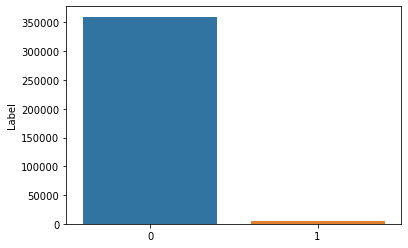

In [7]:
sns.barplot(x=full_df['Label'].value_counts().index, y=full_df['Label'].value_counts())

## Boxplots of measurements of m6a_positive sites vs m6a_negative sites

### m6a_positive sites

In [8]:
m6a_positive = full_df[full_df['Label'] == 1]
m6a_positive

,Transcript Name,Gene Name,Position,Bases,Mean SD,Mean_Mean,Mean Dwelling Time,Median SD,Median_Mean,Median Dwelling Time,Label
52,ENST00000000233,ENSG00000004059,913,GGACC,6.277374,119.296089,0.007148,5.760,119.0,0.005980,1
157,ENST00000000412,ENSG00000003056,2440,GGACT,6.048000,116.400000,0.008958,5.795,116.5,0.007135,1
160,ENST00000000412,ENSG00000003056,2462,GAACC,3.672105,95.657895,0.005710,3.170,95.2,0.004870,1
166,ENST00000000412,ENSG00000003056,2499,GGACA,7.395455,114.863636,0.008391,7.085,115.0,0.006835,1
688,ENST00000007390,ENSG00000007520,1096,AGACA,3.988958,121.875000,0.010426,3.885,121.5,0.008210,1
...,...,...,...,...,...,...,...,...,...,...,...
365485,ENST00000641834,ENSG00000167747,1093,GGACT,4.889315,120.684932,0.008723,4.960,121.0,0.007640,1
365494,ENST00000641834,ENSG00000167747,1255,GGACA,4.964286,116.014286,0.009593,4.715,116.0,0.008020,1
365497,ENST00000641834,ENSG00000167747,1259,AGACA,6.250250,127.475000,0.008347,5.585,128.0,0.007625,1
365500,ENST00000641834,ENSG00000167747,1348,GGACA,4.929726,116.342466,0.007300,4.580,116.0,0.005310,1


In [9]:
# Genes with the highest number of m6a sites
m6a_positive['Gene Name'].value_counts()

ENSG00000103257    45
ENSG00000150991    40
ENSG00000101188    33
ENSG00000185624    32
ENSG00000141526    32
                   ..
ENSG00000166557     1
ENSG00000107789     1
ENSG00000166333     1
ENSG00000166848     1
ENSG00000004059     1
Name: Gene Name, Length: 1507, dtype: int64

### Comparing frequency of bases present in m6a_positive sites vs m6a_negative sites
It appears that weights can be placed depending on the kinds of bases present - e.g., place a greater weight when GGACT/ GAACT is present compared to when other bases is present 

In [10]:
pd.Series(m6a_positive['Bases']).value_counts()
# It appears that GGACT appears the most at m6a sites

GGACT    1440
GAACT     783
GGACA     691
GGACC     552
AGACT     525
TGACT     430
AAACT     255
GAACA     187
AGACA     147
GAACC     124
TGACC      90
TAACT      71
TGACA      68
AGACC      60
AAACA      38
AAACC      11
TAACC       2
TAACA       1
Name: Bases, dtype: int64

In [11]:
m6a_negative = full_df[full_df['Label'] == 0]

In [12]:
m6a_negative_freq_df = m6a_negative['Bases'].value_counts().rename_axis('Bases').reset_index(name='counts')
m6a_negative_freq_df[(m6a_negative_freq_df['Bases'] == 'GGACT') | (m6a_negative_freq_df['Bases'] == 'GAACT') | (m6a_negative_freq_df['Bases'] == 'GGACA')
                    |(m6a_negative_freq_df['Bases'] == 'GGACC') | (m6a_negative_freq_df['Bases'] == 'AGACT') | (m6a_negative_freq_df['Bases'] == 'TGACT')
                    |(m6a_negative_freq_df['Bases'] == 'AAACT') | (m6a_negative_freq_df['Bases'] == 'GAACA') | (m6a_negative_freq_df['Bases'] == 'AGACA')
                    |(m6a_negative_freq_df['Bases'] == 'GAACC') | (m6a_negative_freq_df['Bases'] == 'TGACC') | (m6a_negative_freq_df['Bases'] == 'TAACT')
                    |(m6a_negative_freq_df['Bases'] == 'TGACA') | (m6a_negative_freq_df['Bases'] == 'AGACC') | (m6a_negative_freq_df['Bases'] == 'AGACC')]

,Bases,counts
2,AAACT,8372
3,GAACA,7747
5,TGACA,7650
6,AGACA,7249
7,TGACC,7214
9,GGACA,7036
13,GGACC,6801
15,AGACC,6725
21,TGACT,6359
24,GAACT,6174


In [13]:
m6a_positive_measurements = m6a_positive[['Mean SD','Mean_Mean','Mean Dwelling Time','Median SD','Median_Mean','Median Dwelling Time']]
np.mean(m6a_positive_measurements)

Mean SD                   5.075140
Mean_Mean               114.864291
Mean Dwelling Time        0.008278
Median SD                 4.759633
Median_Mean             114.909251
Median Dwelling Time      0.006972
dtype: float64

<AxesSubplot:xlabel='Mean SD'>

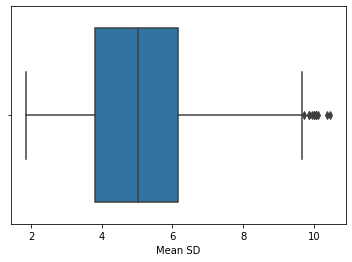

In [14]:
sns.boxplot(x=m6a_positive_measurements['Mean SD'])

<AxesSubplot:xlabel='Mean_Mean'>

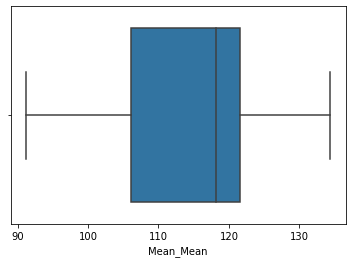

In [15]:
sns.boxplot(x=m6a_positive_measurements['Mean_Mean'])

<AxesSubplot:xlabel='Mean Dwelling Time'>

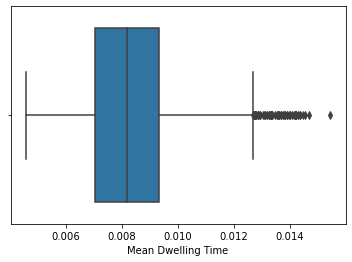

In [16]:
sns.boxplot(x=m6a_positive_measurements['Mean Dwelling Time'])

<AxesSubplot:xlabel='Median SD'>

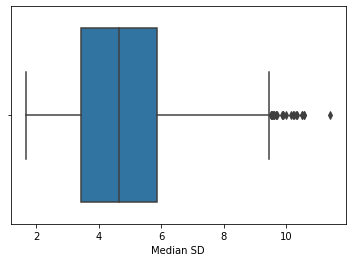

In [17]:
sns.boxplot(x=m6a_positive_measurements['Median SD'])

<AxesSubplot:xlabel='Median_Mean'>

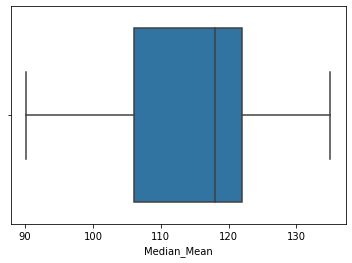

In [18]:
sns.boxplot(x=m6a_positive_measurements['Median_Mean'])

<AxesSubplot:xlabel='Median Dwelling Time'>

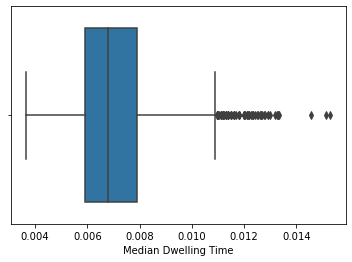

In [19]:
sns.boxplot(x=m6a_positive_measurements['Median Dwelling Time'])

### m6a_negative sites

In [20]:
m6a_negative = full_df[full_df['Label'] == 0]
m6a_negative

,Transcript Name,Gene Name,Position,Bases,Mean SD,Mean_Mean,Mean Dwelling Time,Median SD,Median_Mean,Median Dwelling Time,Label
0,ENST00000000233,ENSG00000004059,243,AAGAC,4.223784,123.702703,0.008264,3.730,125.00,0.006970,0
1,ENST00000000233,ENSG00000004059,244,AGACC,7.382162,125.913513,0.009373,6.650,126.00,0.007970,0
2,ENST00000000233,ENSG00000004059,245,GACCA,4.386989,80.570270,0.007345,3.440,80.50,0.005980,0
3,ENST00000000233,ENSG00000004059,260,CAAAC,3.216424,109.681395,0.006609,2.880,110.00,0.005640,0
4,ENST00000000233,ENSG00000004059,261,AAACT,3.226535,107.889535,0.006813,3.000,108.00,0.005885,0
...,...,...,...,...,...,...,...,...,...,...,...
365509,ENST00000641834,ENSG00000167747,1537,TGACC,6.552982,123.263158,0.007419,5.790,124.00,0.006810,0
365510,ENST00000641834,ENSG00000167747,1538,GACCA,2.540877,82.289474,0.006472,2.330,82.00,0.006310,0
365511,ENST00000641834,ENSG00000167747,1692,TTGAC,4.090577,105.807692,0.008788,3.160,107.00,0.007090,0
365512,ENST00000641834,ENSG00000167747,1693,TGACA,8.702885,113.134615,0.006907,8.675,113.00,0.006705,0


In [21]:
m6a_negative_measurements = m6a_negative[['Mean SD','Mean_Mean','Mean Dwelling Time','Median SD','Median_Mean','Median Dwelling Time']]
np.mean(m6a_negative_measurements)

Mean SD                   4.143960
Mean_Mean               102.460523
Mean Dwelling Time        0.007756
Median SD                 3.912822
Median_Mean             102.568136
Median Dwelling Time      0.006587
dtype: float64

In [22]:
m6a_negative_measurements[m6a_negative_measurements['Mean SD'] >= 8.2]

,Mean SD,Mean_Mean,Mean Dwelling Time,Median SD,Median_Mean,Median Dwelling Time
22,9.343350,119.669951,0.008527,9.150,120.0,0.007420
34,8.337102,115.340909,0.007055,8.350,115.0,0.005940
43,8.945344,116.455027,0.008075,8.820,116.0,0.007300
88,8.902881,114.389831,0.006645,9.330,115.0,0.005640
136,10.906724,116.551724,0.008493,8.625,118.0,0.007640
...,...,...,...,...,...,...
365452,8.689074,115.759259,0.007964,8.065,116.0,0.006310
365455,9.145085,115.152542,0.007014,9.440,115.0,0.005640
365466,8.333824,128.941177,0.008452,8.230,129.0,0.007065
365503,9.105797,114.927536,0.010305,9.140,116.0,0.009600


<AxesSubplot:xlabel='Mean SD'>

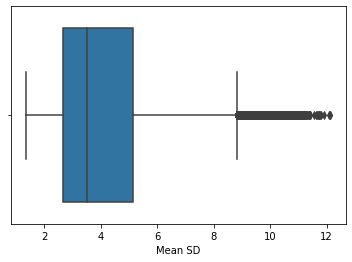

In [23]:
sns.boxplot(x=m6a_negative_measurements['Mean SD'])

<AxesSubplot:xlabel='Mean_Mean'>

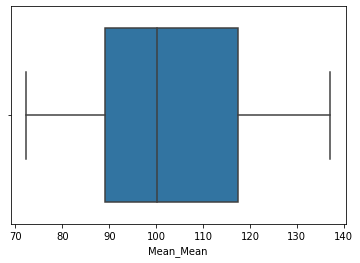

In [24]:
sns.boxplot(x=m6a_negative_measurements['Mean_Mean'])

<AxesSubplot:xlabel='Mean Dwelling Time'>

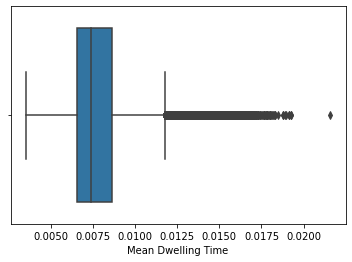

In [25]:
sns.boxplot(x=m6a_negative_measurements['Mean Dwelling Time'])

<AxesSubplot:xlabel='Median SD'>

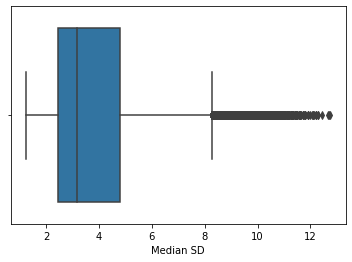

In [26]:
sns.boxplot(x=m6a_negative_measurements['Median SD'])

<AxesSubplot:xlabel='Median_Mean'>

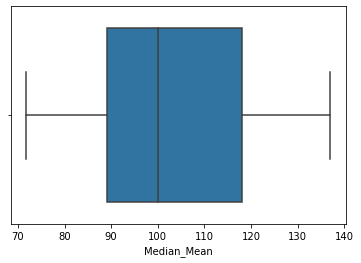

In [27]:
sns.boxplot(x=m6a_negative_measurements['Median_Mean'])

<AxesSubplot:xlabel='Median Dwelling Time'>

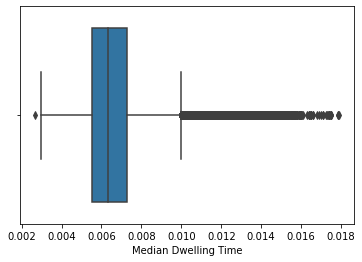

In [28]:
sns.boxplot(x=m6a_negative_measurements['Median Dwelling Time'])

### Pairwise plots between m6a sites and non-m6a sites

In [63]:
np.log(np.linspace(2,10,10))

array([0.69314718, 1.06087196, 1.32913595, 1.54044504, 1.71479843,
       1.86321843, 1.99243016, 2.10684052, 2.20949467, 2.30258509])

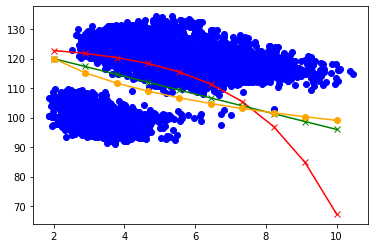

In [106]:
# Mean SD against Mean_Mean
plt.plot(m6a_positive_measurements['Mean SD'], m6a_positive_measurements['Mean_Mean'], 'bo')
plt.plot(np.linspace(2, 10, 10), -(3/2) ** np.linspace(2,10,10) + 125, c='red', marker='x')
plt.plot(np.linspace(2, 10, 10), 126 + -3 * np.linspace(2,10,10) , c='green', marker='x')
plt.plot(np.linspace(2, 10, 10), -13 * np.log(np.linspace(2,10,10)) + 129, c='orange', marker='o') 
# Take note of -13 * np.log(np.linspace(2,10,10)) + 125 < mean_mean < -13 * np.log(np.linspace(2,10,10)) + 129

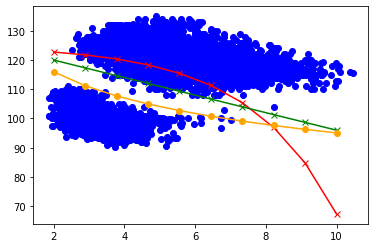

In [108]:
# Mean SD against Median_Mean
plt.plot(m6a_positive_measurements['Mean SD'], m6a_positive_measurements['Median_Mean'], 'bo')
plt.plot(np.linspace(2, 10, 10), -(3/2) ** np.linspace(2,10,10) + 125, c='red', marker='x')
plt.plot(np.linspace(2, 10, 10), 126 + -3 * np.linspace(2,10,10) , c='green', marker='x')
plt.plot(np.linspace(2, 10, 10), -13 * np.log(np.linspace(2,10,10)) + 125, c='orange', marker='o') 
# Take note of -13 * np.log(np.linspace(2,10,10)) + 125 < mean_mean < -13 * np.log(np.linspace(2,10,10)) + 129

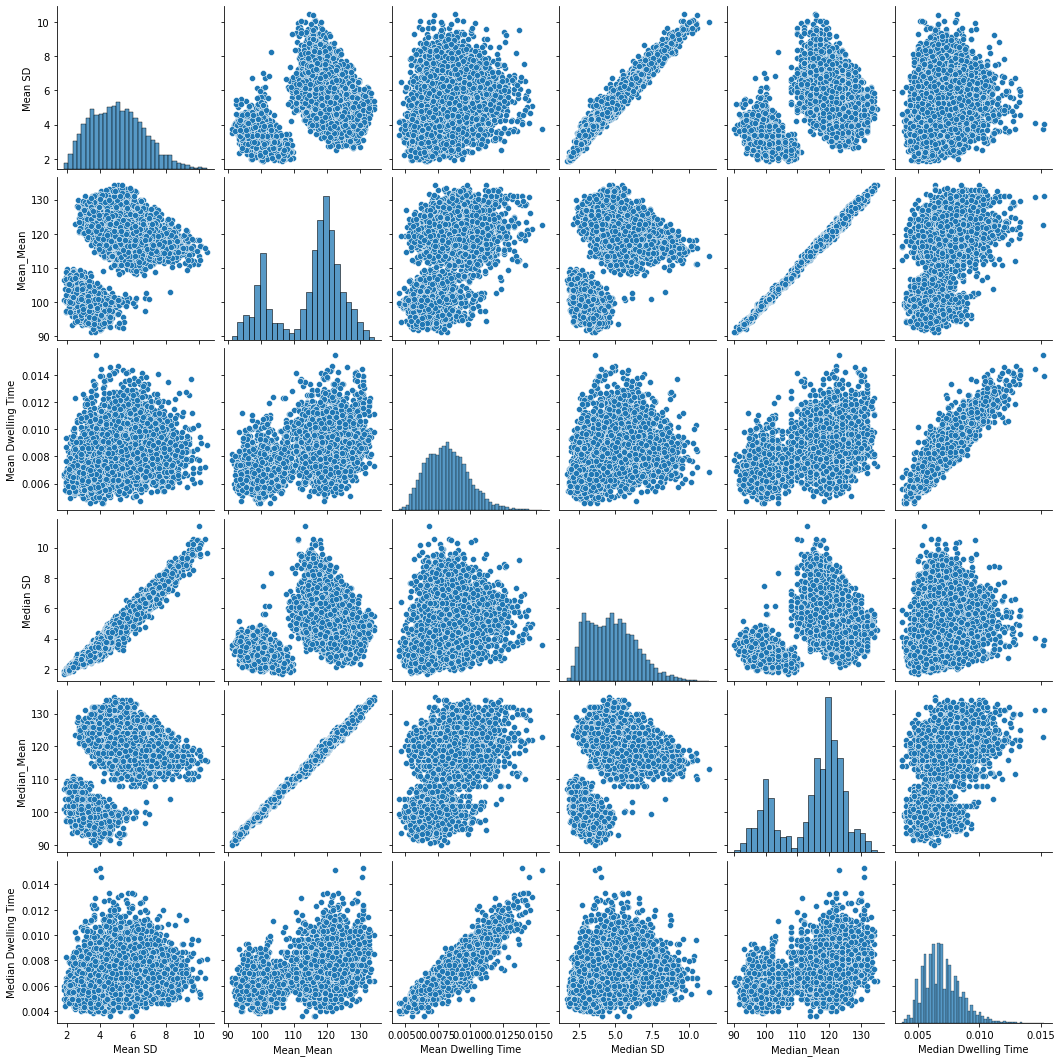

In [34]:
sns.pairplot(m6a_positive_measurements)

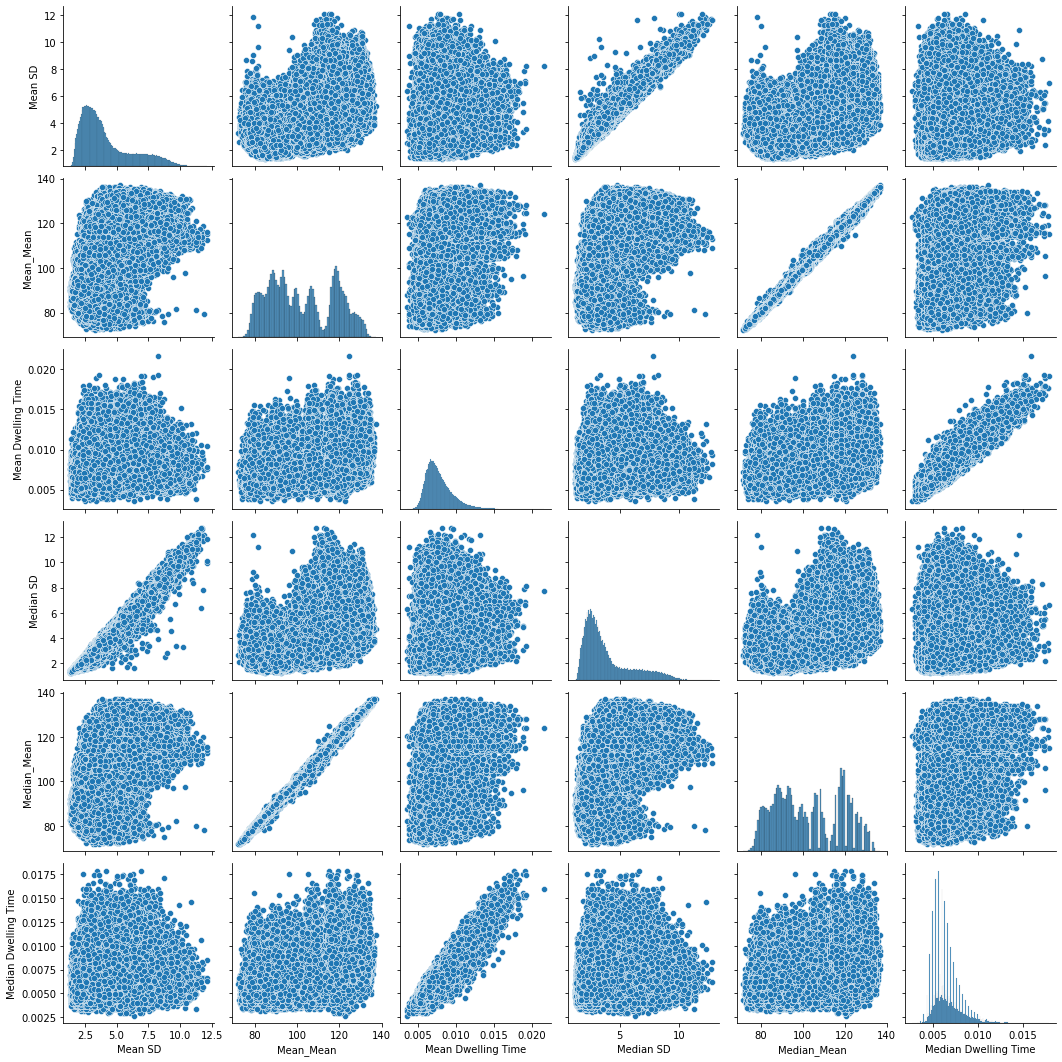

In [35]:
sns.pairplot(m6a_negative_measurements)